In [1]:
from mido import MidiFile
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import numpy as np

proj_base_path = '../../../'
sys.path.append(os.path.join(os.getcwd(), proj_base_path))

dataset_path = os.path.join(proj_base_path, 'datasets')

from src.data_processing.sparse_notes_classified_time.mid2np import mid2np, remove_subsequents_and_count_note_ticks 

In [2]:
mids_dir = os.path.join(dataset_path, 'midi/beethoven/')

mid_paths = [os.path.join(mids_dir, p) for p in os.listdir(mids_dir)]
mids = [MidiFile(p) for p in mid_paths]
for m in mids: print(m)

<midi file '../../../datasets/midi/beethoven/waldstein_1.mid' type 1, 8 tracks, 20950 messages>
<midi file '../../../datasets/midi/beethoven/beethoven_opus90_2.mid' type 1, 17 tracks, 10106 messages>
<midi file '../../../datasets/midi/beethoven/waldstein_2.mid' type 1, 8 tracks, 1250 messages>
<midi file '../../../datasets/midi/beethoven/beethoven_opus90_1.mid' type 1, 17 tracks, 6320 messages>
<midi file '../../../datasets/midi/beethoven/waldstein_3.mid' type 1, 9 tracks, 19361 messages>
<midi file '../../../datasets/midi/beethoven/beethoven_opus10_2.mid' type 1, 17 tracks, 4187 messages>
<midi file '../../../datasets/midi/beethoven/beethoven_opus10_3.mid' type 1, 17 tracks, 7154 messages>
<midi file '../../../datasets/midi/beethoven/elise.mid' type 1, 8 tracks, 3192 messages>
<midi file '../../../datasets/midi/beethoven/beethoven_opus10_1.mid' type 1, 17 tracks, 8237 messages>
<midi file '../../../datasets/midi/beethoven/appass_2.mid' type 1, 11 tracks, 5418 messages>
<midi file '../

In [4]:
# durations = [mid2np(m)[1] for m in mids]
durations = []
for m in mids:
    durations.append(mid2np(m)[1])
    print(f'finished: {m}')

for d in durations: print(d.size, d.max())
durations = np.concatenate(durations)
durations.shape

finished: <midi file '../../../datasets/midi/beethoven/waldstein_1.mid' type 1, 8 tracks, 20950 messages>
finished: <midi file '../../../datasets/midi/beethoven/beethoven_opus90_2.mid' type 1, 17 tracks, 10106 messages>
finished: <midi file '../../../datasets/midi/beethoven/waldstein_2.mid' type 1, 8 tracks, 1250 messages>
finished: <midi file '../../../datasets/midi/beethoven/beethoven_opus90_1.mid' type 1, 17 tracks, 6320 messages>
finished: <midi file '../../../datasets/midi/beethoven/waldstein_3.mid' type 1, 9 tracks, 19361 messages>
finished: <midi file '../../../datasets/midi/beethoven/beethoven_opus10_2.mid' type 1, 17 tracks, 4187 messages>
finished: <midi file '../../../datasets/midi/beethoven/beethoven_opus10_3.mid' type 1, 17 tracks, 7154 messages>
finished: <midi file '../../../datasets/midi/beethoven/elise.mid' type 1, 8 tracks, 3192 messages>
finished: <midi file '../../../datasets/midi/beethoven/beethoven_opus10_1.mid' type 1, 17 tracks, 8237 messages>
finished: <midi fi

(76742,)

In [5]:
durations.min(), durations.max()

(0.01, 6.48)

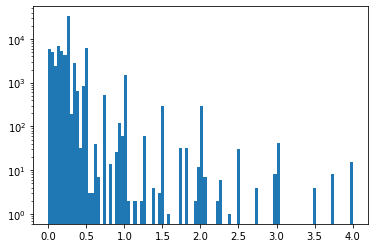

In [6]:
import matplotlib.pyplot as plt

plt.hist(durations, bins=100, range=(0, 4), log=True)
plt.show()

In [7]:
from sklearn.cluster import DBSCAN, KMeans

# db = DBSCAN(eps=0.03).fit(durations.reshape(-1, 1))
db = KMeans(n_clusters=24).fit(durations.reshape(-1, 1))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
label: 0    count: 33136, min:    0.24, max:    0.28, avg:    0.25, std:    0.00, med:    0.25
label: 1    count: 5721, min:    0.49, max:    0.62, avg:    0.50, std:    0.01, med:    0.50
label: 2    count:  320, min:    1.95, max:    2.25, avg:    2.01, std:    0.04, med:    2.00
label: 3    count: 4280, min:    0.03, max:    0.05, avg:    0.04, std:    0.01, med:    0.04
label: 4    count: 1719, min:    0.88, max:    1.12, avg:    0.99, std:    0.02, med:    1.00
label: 5    count:   19, min:    4.38, max:    4.75, avg:    4.51, std:    0.09, med:    4.50
label: 6    count:  296, min:    1.38, max:    1.57, avg:    1.50, std:    0.02, med:    1.50
label: 7    count: 6909, min:    0.10, max:    0.14, avg:    0.12, std:    0.00, med:    0.12
label: 8    count:   53, min:    2.75, max:    3.00, avg:    2.98, std:    0.07, med:    3.00
label: 9    count:  545, min:    0.67, max:    0.82, avg:    0.75, std:    0.01

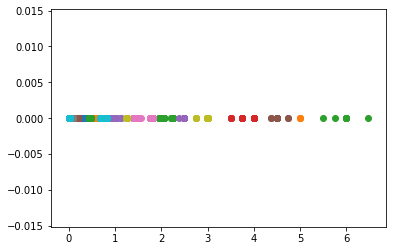

In [8]:
print(np.unique(db.labels_))

for label in np.unique(db.labels_):
    X = durations[db.labels_ == label]
    Y = np.zeros_like(X)
    
    print(f'label: {label: <4} count: {X.size: >4}, min: {X.min():7.2f}, max: {X.max():7.2f}, avg: {X.mean():7.2f}, std: {X.std():7.2f}, med: {np.median(X):7.2f}')
    
    plt.scatter(X, Y)
    
plt.show()

In [24]:
db.predict(durations.reshape(-1, 1))

array([20,  2, 20, ...,  2, 20, 17], dtype=int32)